In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.fftpack import fft, ifft

import sys
sys.path.append("../library/")
from defaultPlot import *
from readData import read, readPoints, extractRepeater, readCSV
from stringFormat import *
from parameters import *

# Read Data

In [2]:
time = {}
trialTime = {}
points = {}
# ---------------------------------------------------------
ageDist_time = {}
ageDist_op = {}
clusterSizeDist = {}
clusterSizeDist_exact = {}
clusterSizeDist_time = {}
deltaUpperBoundDist_time = {}
deltaUpperBoundDist_op = {}
deltaUpperBoundDist_tot = {}
interEventTime = {}
interEventTimeDist_time = {}
interEventTimeDist_op = {}
interEventTimeDist_tot = {}
interEventTime_deltaUpperBound = {}
meanClusterSize = {}
meanClusterSize_trial = {}
orderParameter = {}
orderParameter_trial = {}
orderParameterDist = {}
orderParameterVariance = {}
orderParameterVariance_trial = {}
dynamics = {}

In [7]:
# for networkSize in networkSizeList[:]:
for networkSize in [160000]:
    time[networkSize] = np.arange(0, 1, 1/networkSize)
    # for acceptanceThreshold in acceptanceThresholdList[:]:
    for acceptanceThreshold in [0.5]:
        current = networkSize, acceptanceThreshold
        # points[current] = readPoints(networkSize, acceptanceThreshold)
        # dynamics[current] = read("dynamics", networkSize, acceptanceThreshold)
# --------------------------------------------------------------------------------------------------------

        # orderParameter[current] = read("orderParameter", networkSize, acceptanceThreshold)
        # meanClusterSize[current] = read("meanClusterSize", networkSize, acceptanceThreshold)
        # orderParameterVariance[current] = read("orderParameterVariance", networkSize, acceptanceThreshold)
        # interEventTime[current] = read("interEventTime", networkSize, acceptanceThreshold)
        
# --------------------------------------------------------------------------------------------------------      
 
        deltaUpperBoundDist_tot[current] = read("deltaUpperBoundDist_tot", networkSize, acceptanceThreshold)
        interEventTimeDist_tot[current] = read("interEventTimeDist_tot", networkSize, acceptanceThreshold)
        # for state in ["before", "during", "after"]:
        #     ageDist_time[current, state] = read("ageDist_time/" + state, networkSize, acceptanceThreshold)
        #     ageDist_op[current, state] = read("ageDist_op/" + state, networkSize, acceptanceThreshold)
        #     interEventTimeDist_time[current, state] = read("interEventTimeDist_time/" + state, networkSize, acceptanceThreshold)
        #     interEventTimeDist_op[current, state] = read("interEventTimeDist_op/" + state, networkSize, acceptanceThreshold)
        #     deltaUpperBoundDist_time[current, state] = read("deltaUpperBoundDist_time/" + state, networkSize, acceptanceThreshold)
        #     deltaUpperBoundDist_op[current, state] = read("deltaUpperBoundDist_op/" + state, networkSize, acceptanceThreshold)
        #     interEventTime_deltaUpperBound[current, state] = read("interEventTime_deltaUpperBound/" + state, networkSize, acceptanceThreshold)

# --------------------------------------------------------------------------------------------------------       
 
        # for op in extractRepeater("clusterSizeDist", networkSize, acceptanceThreshold):
        #     clusterSizeDist[current, op] = read("clusterSizeDist", networkSize, acceptanceThreshold, op)
        # for t in extractRepeater("orderParameterDist", networkSize, acceptanceThreshold):
        #     orderParameterDist[current, t] = read("orderParameterDist", networkSize, acceptanceThreshold, t)

        # for op in extractRepeater("clusterSizeDist_exact", networkSize, acceptanceThreshold):
        #     clusterSizeDist_exact[current, op] = read("clusterSizeDist_exact", networkSize, acceptanceThreshold, op)
        # for t in extractRepeater("clusterSizeDist_time", networkSize, acceptanceThreshold):
        #     clusterSizeDist_time[current, t] = read("clusterSizeDist_time", networkSize, acceptanceThreshold, t)

# --------------------------------------------------------------------------------------------------------        
        # trialTime[current] = np.arange(0, len(orderParameter[current])/networkSize, 1/networkSize)
        # orderParameter_trial[current] = read("orderParameter_trial", networkSize, acceptanceThreshold)
        # meanClusterSize_trial[current] = read("meanClusterSize_trial", networkSize, acceptanceThreshold)
        # orderParameterVariance_trial[current] = read("orderParameterVariance_trial", networkSize, acceptanceThreshold)

../data/mBFW/deltaUpperBoundDist_tot/logBin/N1.6e+05,G0.5*
../data/mBFW/interEventTimeDist_tot/logBin/N1.6e+05,G0.5*


# Plot zoomed order parameter and maximum slope

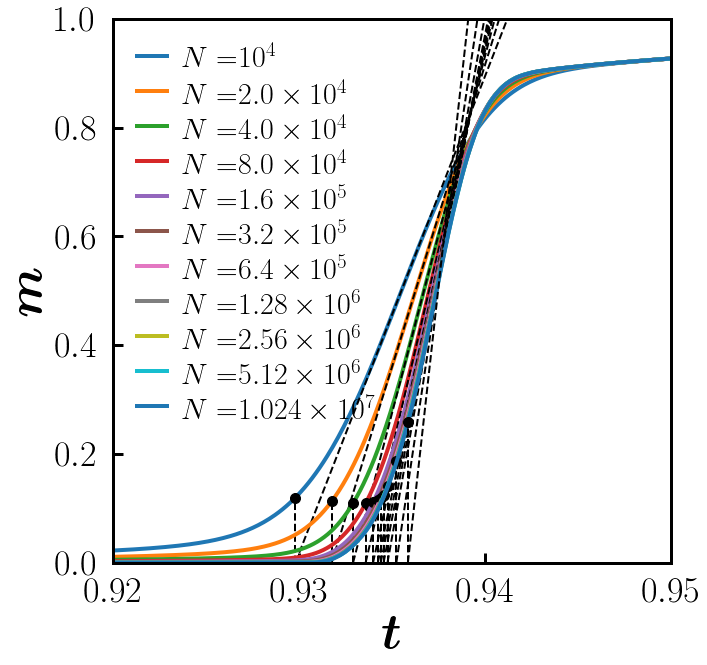

In [4]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
plotRange = chi_plotRange[acceptanceThreshold]

for networkSize in networkSizeList[:]:
# for networkSize in [20000, 80000, 1280000]:
    current = networkSize, acceptanceThreshold
    start = int(plotRange[0] * networkSize); end = int(plotRange[1] * networkSize)
    op = orderParameter[current][start:end]; t = time[networkSize][start:end]
    t_inflection = points[current]["t_inflection"]; m_inflection = points[current]["m_inflection"]; t_a = points[current]["t_a"]
    t_a = points[current]["t_a"]; m_a = points[current]["m_a"]

    ax.plot(t, op, label = latexString("N=") + latexSci(networkSize))
    ax.plot(t_a, m_a, 'ko', markersize = 10)
    ax.plot([t_a, t_a+(t_inflection - t_a)/m_inflection], [0, 1], 'k--', linewidth = 2)
    ax.plot([t_a, t_a], [0.0, m_a], 'k--', linewidth = 2)

ax.set_xlim(plotRange)
ax.set_ylim([0,1])
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("m"))
ax.legend(loc = "upper left", fontsize = 30)

# plt.savefig("./fig/orderParameter.png", bbox_inches = 'tight', pad_inches = 0.0, facecolor = 'w')
plt.show()

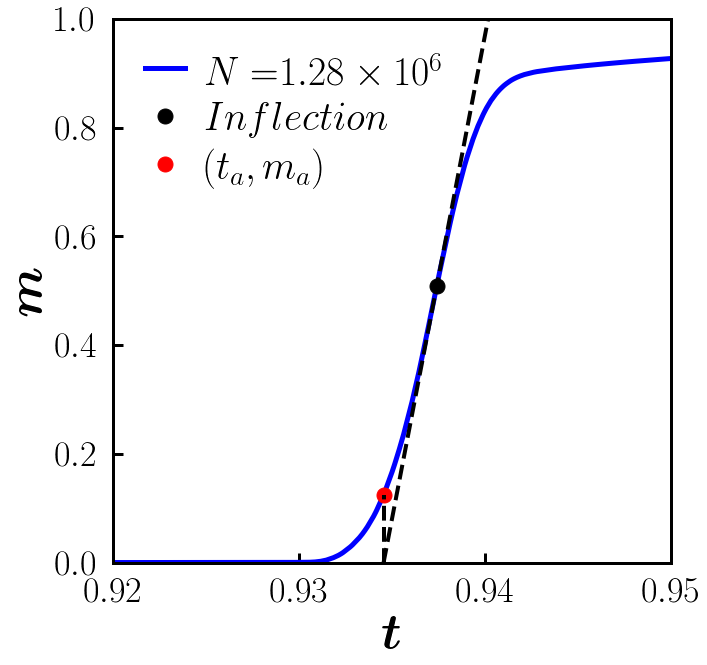

In [18]:
_, ax = plt.subplots(figsize = (10,10))

networkSize = 1280000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
plotRange = chi_plotRange[acceptanceThreshold]
start = int(plotRange[0] * networkSize); end = int(plotRange[1] * networkSize)
op = orderParameter[current][start:end]; t = time[networkSize][start:end]
t_a = points[current]["t_a"]; m_a = points[current]["m_a"]
t_inflection = points[current]["t_inflection"]; m_inflection = points[current]["m_inflection"]; t_a = points[current]["t_a"]
t_c = points[current]["t_c_var"]; m_c = points[current]["m_c_mcs"]


ax.plot(t, op, color = 'b', linewidth = 5, label=latexString("N=") + latexSci(networkSize))

# ax.plot(t_c, m_c, 'ko')
ax.plot(t_inflection, m_inflection, 'o', markersize = 15, label=latexString("Inflection"), color='black')
ax.plot(t_a, m_a, 'o', markersize = 15, label=latexString("(t_a, m_a)"), color="red")
ax.plot([t_a, t_a+(t_inflection - t_a)/m_inflection], [0, 1], 'k--')
ax.plot([t_a, t_a], [0.0, m_a], 'k--')
ax.set_xlim(plotRange)
ax.set_ylim([0,1])
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("m"))
ax.legend(loc="upper left")

plt.savefig("../data/mBFW/fig/t_a,m_a(N1.3e6,G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.0, facecolor = 'w')

plt.show()

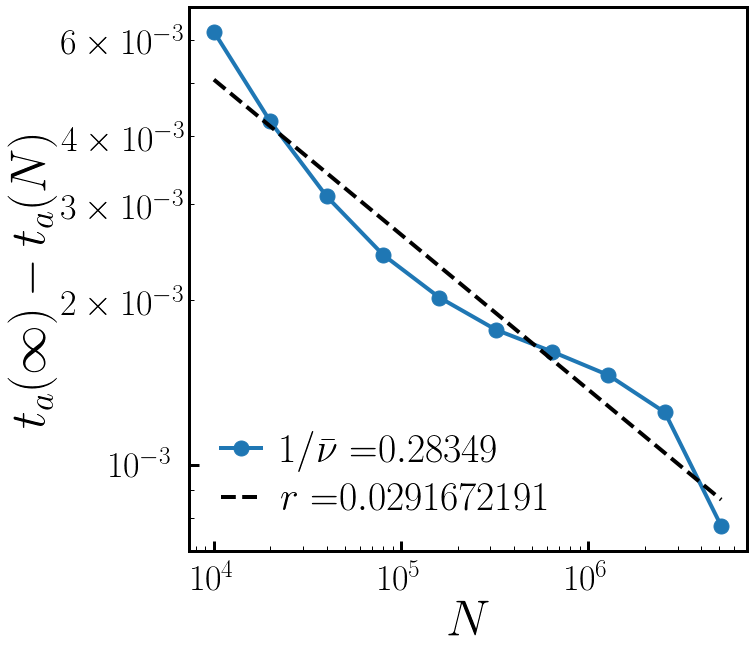

In [15]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
x = networkSizeList[:-1]
# x = [10000, 20000, 40000, 80000,160000, 320000, 640000, 1280000]
y = []
for networkSize in x:
    point = readPoints(networkSize, acceptanceThreshold)
    y.append(0.936 - point["t_a"])
    # y.append(t_c_var_inf[acceptanceThreshold] - point["t_c_var"])

fitX, fitY, nu, residual = logFit(x,y, offset=0)
ax.plot(x,y ,'o-', label=latexString("1/\\bar{\\nu}=") + latexFloat(-1*nu, 5))
ax.plot(fitX, fitY, 'k--', label=latexString("r=") + latexFloat(residual[0],10))

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexString("N")); ax.set_ylabel(latexString("t_a(\infty) - t_a(N)"))
ax.legend(loc="lower left")

plt.show()

# Plot Variance of order parameter

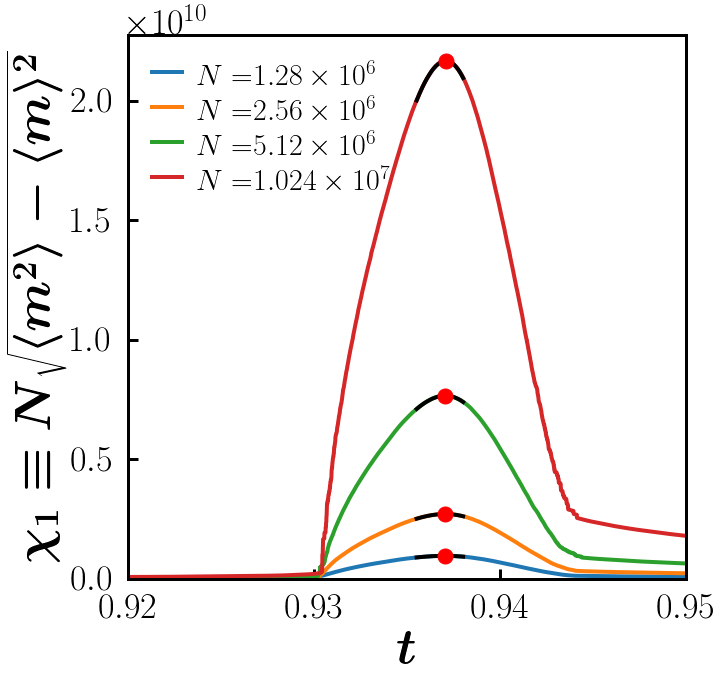

In [33]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
plotRange = chi_plotRange[acceptanceThreshold]

# for networkSize in networkSizeList[:]:
for networkSize in [1280000, 2560000, 5120000, 10240000]:
    current = networkSize, acceptanceThreshold
    fitRange = chi_fitRange[current]
    plotIndex = int(plotRange[0] * networkSize),int(plotRange[1] * networkSize); fitIndex = int(fitRange[0] * networkSize), int(fitRange[1] * networkSize)
    opv = orderParameterVariance[current]; t = time[networkSize]
    opv = networkSize * np.sqrt(opv)
    
    fit_poly = np.poly1d(np.polyfit(t[fitIndex[0]:fitIndex[1]], opv[fitIndex[0]:fitIndex[1]], 3))
    max_index = np.argmax(fit_poly(t[fitIndex[0]:fitIndex[1]]))
    t_c = t[fitIndex[0]+max_index]; m_c = orderParameter[current][fitIndex[0]+max_index]

    ax.plot(t[plotIndex[0]:plotIndex[1]], opv[plotIndex[0]:plotIndex[1]], label = latexString("N=") + latexSci(networkSize))
    ax.plot(t[fitIndex[0]:fitIndex[1]], fit_poly(t[fitIndex[0]:fitIndex[1]]), 'k-')
    ax.plot(t_c, fit_poly(t_c), 'ro')

    # with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(networkSize, acceptanceThreshold) + ".txt", 'a') as file:
    #     file.write("t_c_var: " + str(t_c) + "\n")
    #     file.write("m_c_var: " + str(m_c) + "\n")

ax.set_xlim(plotRange); ax.set_ylim(bottom = 0)
ax.set_xlabel(latexBoldString("t")); ax.set_ylabel(latexBoldString("\chi_1 \equiv N\sqrt{\langle m^2 \\rangle - \langle m \\rangle^2}"))
ax.legend(loc = "upper left", fontsize = 30)
# plt.savefig("../data/mBFW/fig/opv(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.0, facecolor = 'w')


plt.show()


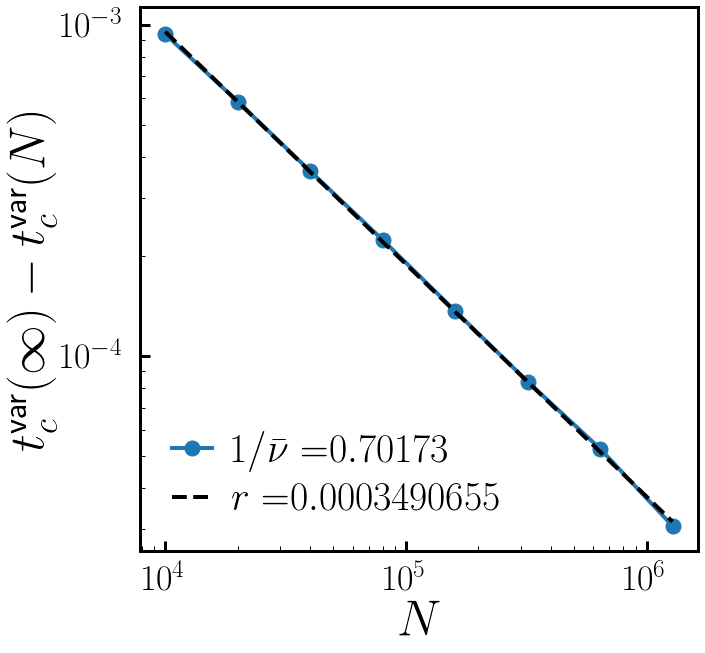

In [41]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
x = networkSizeList[:]
# x = [10000, 20000, 40000, 80000,160000, 320000, 640000, 1280000]
y = []
for networkSize in x:
    point = readPoints(networkSize, acceptanceThreshold)
    y.append(0.983737 - point["t_c_var"])
    # y.append(t_c_var_inf[acceptanceThreshold] - point["t_c_var"])

fitX, fitY, nu, residual = logFit(x,y, offset=0)
ax.plot(x,y ,'o-', label=latexString("1/\\bar{\\nu}=") + latexFloat(-1*nu, 5))
ax.plot(fitX, fitY, 'k--', label=latexString("r=") + latexFloat(residual[0],10))

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("N")); ax.set_ylabel(latexBoldString("t_c^\\text{var}(\infty) - t_c^\\text{var}(N)"))
ax.legend(loc="lower left")

plt.show()

# Plot mean cluster size

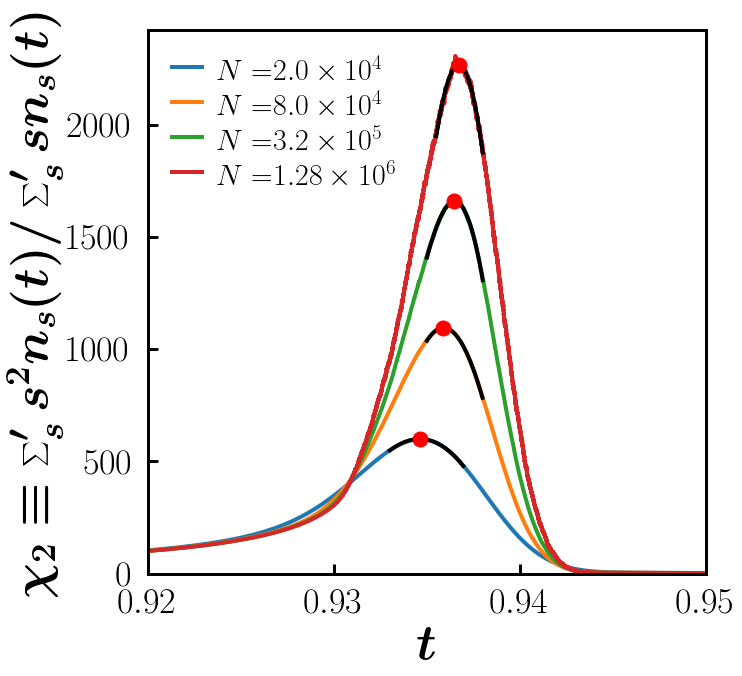

In [21]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
plotRange = chi_plotRange[acceptanceThreshold]


# for networkSize in networkSizeList[:]:
for networkSize in [20000, 80000, 320000, 1280000]:
    current = networkSize, acceptanceThreshold 
    fitRange = chi_fitRange[networkSize, acceptanceThreshold]
    plotIndex = int(plotRange[0] * networkSize),int(plotRange[1] * networkSize)
    fitIndex = int(fitRange[0] * networkSize), int(fitRange[1] * networkSize)
    mcs = meanClusterSize[current]; t = time[networkSize]

    fit_poly = np.poly1d(np.polyfit(t[fitIndex[0]:fitIndex[1]], mcs[fitIndex[0]:fitIndex[1]], 3))
    max_index = np.argmax(fit_poly(t[fitIndex[0]:fitIndex[1]]))
    t_c = t[fitIndex[0]+max_index]; m_c = orderParameter[current][fitIndex[0]+max_index]

    ax.plot(t[plotIndex[0]:plotIndex[1]], mcs[plotIndex[0]:plotIndex[1]], label = latexString("N=") + latexSci(networkSize))
    ax.plot(t[fitIndex[0]:fitIndex[1]], fit_poly(t[fitIndex[0]:fitIndex[1]]), 'k-')
    ax.plot(t_c, fit_poly(t_c), 'ro')

    # with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(networkSize, acceptanceThreshold) + ".txt", 'a') as file:
    #     file.write("t_c_mcs: " + str(t_c) + "\n")
    #     file.write("m_c_mcs: " + str(m_c) + "\n")

ax.set_xlim(plotRange)
ax.set_ylim(bottom = 0)
ax.legend(loc = "upper left", fontsize = 30)
ax.set_xlabel(latexBoldString("t")); ax.set_ylabel(latexBoldString("\chi_2 \equiv \sum_s'{s^2 n_s(t)} / \sum_s' {s n_s(t)} "))

# plt.savefig("../data/mBFW/fig/mcs(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.0, facecolor = 'w')

plt.show()


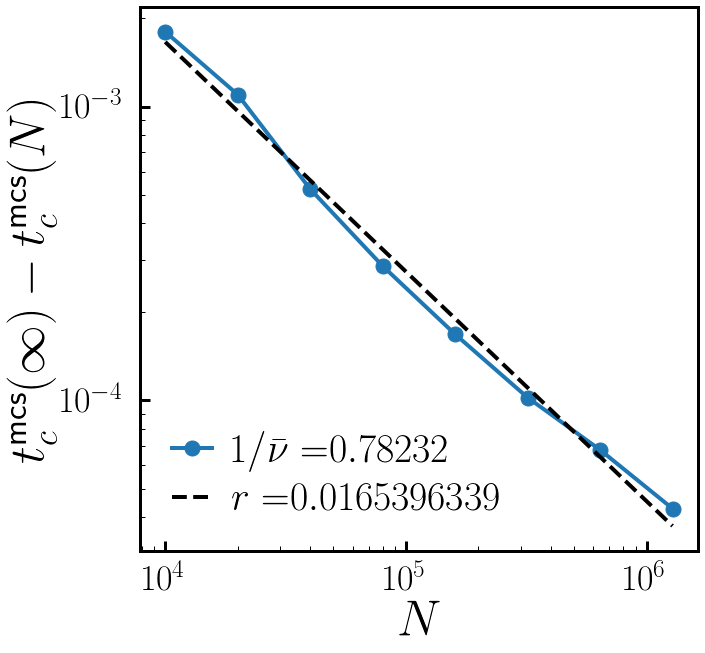

In [55]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.3

x = networkSizeList[:-3]
# x = [10000, 20000, 40000, 80000,160000, 320000, 640000, 1280000, 2560000, 10240000]
y = []
for networkSize in x:
    point = readPoints(networkSize, acceptanceThreshold)
    y.append(0.983699 - point["t_c_mcs"])
    # y.append(t_c_mcs_inf[acceptanceThreshold] - point["t_c_mcs"])

fitX, fitY, nu, residual = logFit(x,y, offset=0)
ax.plot(x,y ,'o-', label=r"$1/\bar{\nu}=$" + latexFloat(-1*nu, 5))
ax.plot(fitX, fitY, 'k--', label=r"$r=$" + latexFloat(residual[0],10))

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("N")); ax.set_ylabel(latexBoldString("t_c^\\text{mcs}(\infty) - t_c^\\text{mcs}(N)"))
ax.legend(loc='lower left')

plt.show()

# Finit Size Scaling

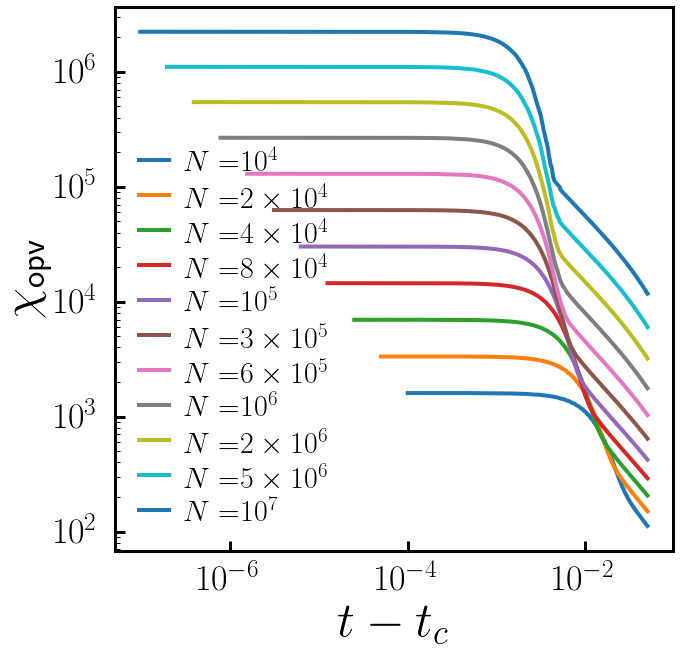

In [72]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.9

t_c = t_c_var_inf[acceptanceThreshold]
for networkSize in networkSizeList[:]:
    t_c = t_c_var[networkSize, acceptanceThreshold]
    opv = orderParameterVariance[networkSize, acceptanceThreshold]
    t = time[networkSize]
    startIndex = int(t_c*networkSize)+1
    endIndex = int((t_c+5e-2)*networkSize)
    ax.plot(t[startIndex:endIndex]-t_c, opv[startIndex:endIndex], label = latexString("N=") + latexSci(networkSize))


ax.legend(loc = "lower left", fontsize = 30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$t-t_c$")
ax.set_ylabel(r"$\chi_\text{opv}$")

plt.show()


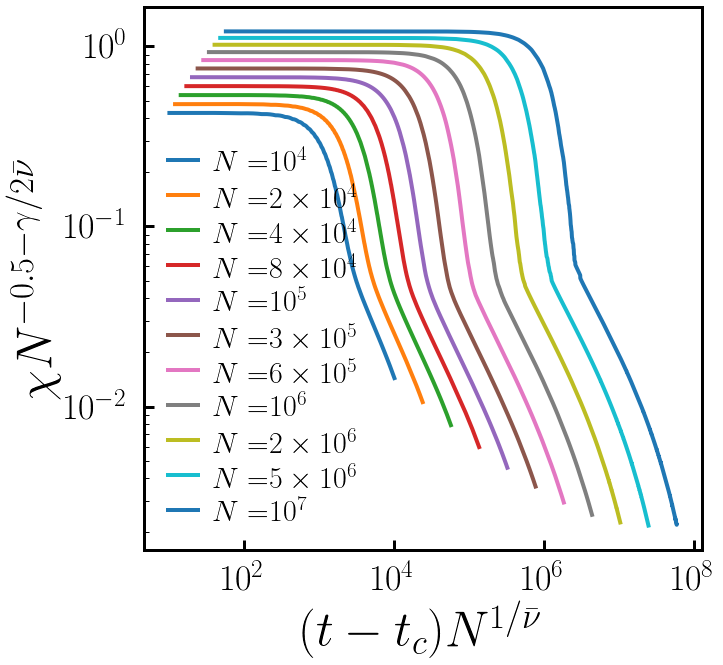

In [79]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.9

t_c = t_c_var_inf[acceptanceThreshold]
for networkSize in networkSizeList[:]:
    t_c = t_c_var[networkSize, acceptanceThreshold]
    opv = orderParameterVariance[networkSize, acceptanceThreshold] 
    t = time[networkSize] 
    startIndex = int(t_c*networkSize)+1
    endIndex = int((t_c+1e-1)*networkSize)
    nu_bar = nu_bar_var[acceptanceThreshold]
    gamma = 0.63
    nu_bar = 0.8
    ax.plot((t[startIndex:endIndex]-t_c)* np.power(networkSize, 1/nu_bar), opv[startIndex:endIndex]* np.power(networkSize, -0.5-gamma/(2*nu_bar)), label = latexString("N=") + latexSci(networkSize))


ax.legend(loc = "lower left", fontsize = 30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$(t-t_c)N^{1/\bar{\nu}}$")
ax.set_ylabel(r"$\chi N^{-0.5-\gamma/2\bar{\nu}}$")

plt.show()


# Cluster Size Distribution

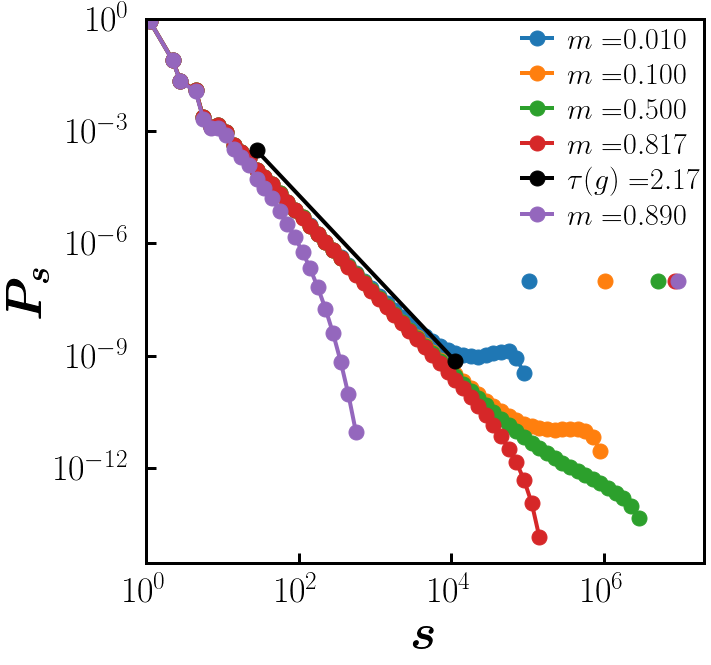

In [20]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10240000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
fitRange = csd_fitRange[current]
# fitRange = [11, 36]

def plotCSD(op, fit = False):
    csd, dist = clusterSizeDist[current, op]
    fitX, fitY, tau, residual = logFit(csd[fitRange[0] : fitRange[1]], dist[fitRange[0] : fitRange[1]], offset=-0.5)
    color = next(ax._get_lines.prop_cycler)['color']
    # ax.plot(csd[:-1], dist[:-1], 'o-', label=latexString("m=") + latexFloat(op,3) + latexString(", r=") + latexFloat(residual[0], 6), color = color)
    ax.plot(csd[:-1], dist[:-1], 'o-', label=latexString("m=") + latexFloat(op,3), color = color)
    ax.plot(op*networkSize, 1/networkSize, 'o', color = color)
    if fit:
        ax.plot(fitX, fitY, 'ko-', label=latexString("\\tau(g)=") + latexFloat(-tau,2))

op = 0.01; plotCSD(op)
op = 0.1; plotCSD(op)
op = 0.5; plotCSD(op)
op = 0.817; plotCSD(op, fit=True)
op = 0.89; plotCSD(op)

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim(left=1); ax.set_ylim(top=1)
ax.set_xlabel(latexBoldString("s")); ax.set_ylabel(latexBoldString("P_s"))
ax.legend(loc='upper right', borderpad = 0.1, borderaxespad = 0.1, fontsize=30)

# plt.savefig("../data/mBFW/fig/csd(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()

# Age Distribution

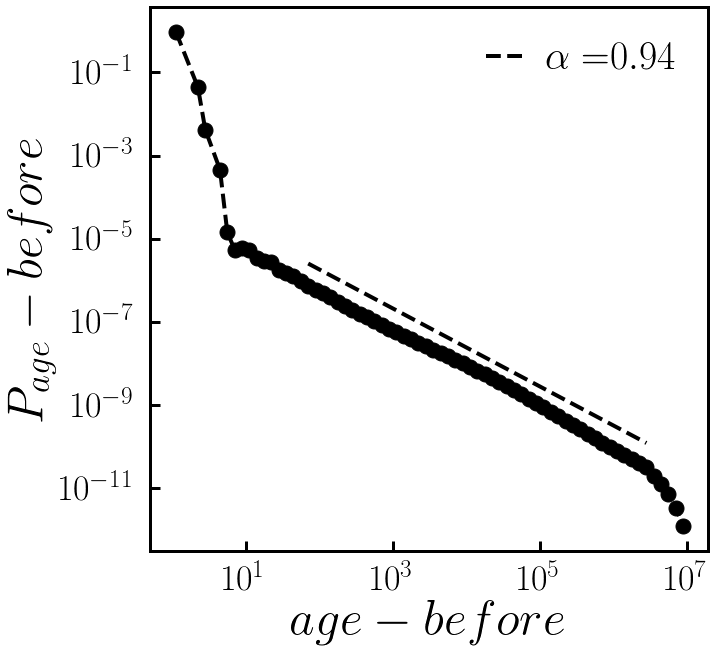

In [110]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10240000; acceptanceThreshold = 0.4
current = networkSize, acceptanceThreshold

# main plot
age, dist = ageDist_time[current, "before"]
ax.plot(age, dist, 'ko--')
# log fit
fitX, fitY, alpha, residual = logFit(age[15:-5], dist[15:-5], offset=-0.5)
ax.plot(fitX, fitY, 'k--', label=latexString("\\alpha=") + latexFloat(-1 * alpha ,2))

# main setting
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexString("age-before")); ax.set_ylabel(latexString("P_{age}-before"))
ax.legend(loc='upper right')

# save and show
plt.show()

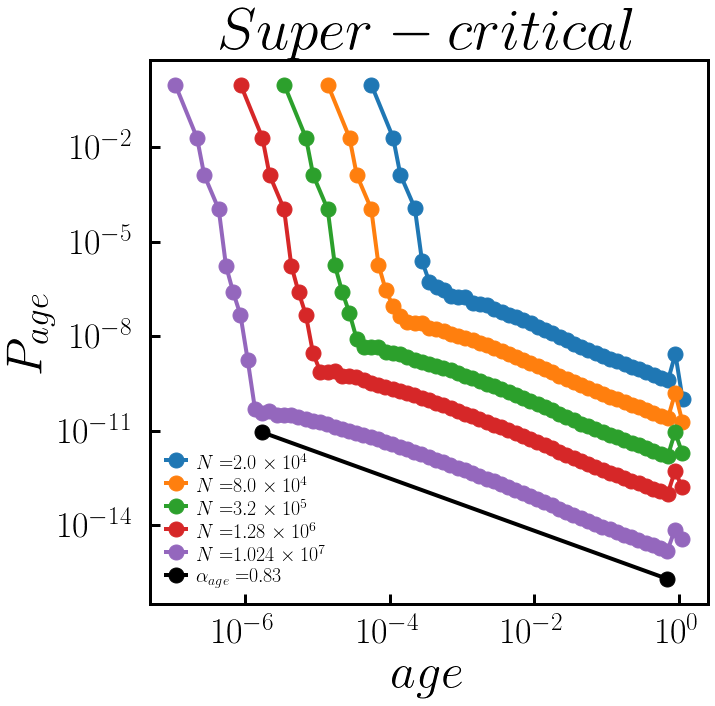

In [33]:
_, ax = plt.subplots(figsize=(10,10))

acceptanceThreshold = 0.5

# main plot
# for networkSize in networkSizeList[:]:
for networkSize in [20000, 80000, 320000, 1280000, 10240000]:
    current = networkSize, acceptanceThreshold

    # age, dist = ageDist_op[current, "before"]
    # age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    # ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    # fitX, fitY, alpha, residual = logFit(age[:-8], dist[:-8], offset = 1.0)

    # age, dist = ageDist_op[current, "during"]
    # age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    # ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    # fitX, fitY, alpha, residual = logFit(age[:], dist[:], offset = 1.0)

    age, dist = ageDist_op[current, "after"]
    age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    fitX, fitY, alpha, residual = logFit(age[9:-2], dist[9:-2], offset = 1.0)
#------------------------------------------------------------------------------------------
    # age, dist = ageDist_time[current, "before"]
    # age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    # ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    # fitX, fitY, alpha, residual = logFit(age[6:-7], dist[6:-7], offset = 1.0)

    # age, dist = ageDist_time[current, "during"]
    # age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    # ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    # fitX, fitY, alpha, residual = logFit(age[6:-1], dist[6:-1], offset = 1.0)

    # age, dist = ageDist_time[current, "after"]
    # age = age[dist != 0]; dist = dist[dist != 0]; age = age / networkSize
    # ax.plot(age[:], dist[:], 'o-', label=latexString("N=") + latexSci(networkSize))
    # fitX, fitY, alpha, residual = logFit(age[7:-2], dist[7:-2], offset = 1.0)

# log fit
ax.plot(fitX, fitY, 'ko-', label=latexString("\\alpha_{age}=") + latexFloat(-1*alpha, 2))

# main setting
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexString("age")); ax.set_ylabel(latexString("P_{age}"))
ax.legend(loc='lower left', fontsize=20)
# plt.title(latexString("Sub-critical"))
# plt.title(latexString("critical"))
plt.title(latexString("Super-critical"))

# save and show
# plt.savefig("../data/mBFW/fig/age_superOP(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()



# Inter Event Time Dist

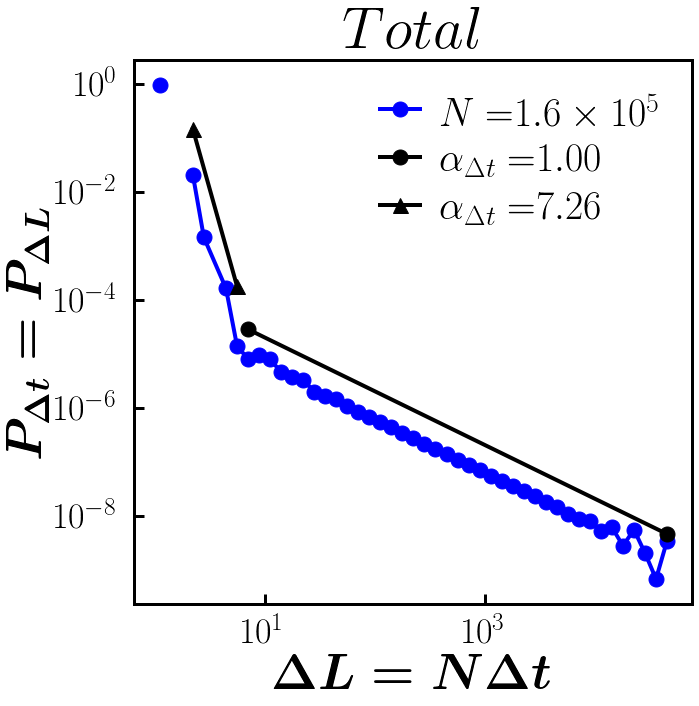

In [22]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 160000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

# main plot
# iet, dist = interEventTimeDist_op[current, "before"]
# iet = iet/networkSize
# fitX, fitY, alpha, residual = logFit(iet[11:-10], dist[11:-10], offset=-0.5)

# iet, dist = interEventTimeDist_op[current, "during"]
# iet = iet/networkSize
# fitX, fitY, alpha, residual = logFit(iet[:], dist[:], offset=-0.5)

# iet, dist = interEventTimeDist_op[current, "after"]
# iet = iet/networkSize

iet, dist = interEventTimeDist_tot[current]
fitX, fitY, alpha, residual = logFit(iet[5:], dist[5:], offset=-0.5)
fitX2, fitY2, alpha2, residual2 = logFit(iet[1:5], dist[1:5], offset=-1.0)


ax.plot(iet[0], dist[0], 'o', color='b')
ax.plot(iet[1:], dist[1:], 'o-', color = 'b', label=latexString("N=") + latexSci(networkSize))
ax.plot(fitX, fitY, 'ko-', label=latexString("\\alpha_{\\Delta t}=") + latexFloat(-1*alpha, 2))
ax.plot(fitX2, fitY2, 'k^-', label=latexString("\\alpha_{\\Delta t}=") + latexFloat(-1*alpha2, 2))


# main setting
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\\Delta L=N \\Delta t")); ax.set_ylabel(latexBoldString("P_{\\Delta t} = P_{\\Delta L}"))
ax.legend(loc='upper right')
# ax.set_xlim(right = 1); ax.set_ylim(top = 1)
# plt.title(latexString("Sub-critical"))
# plt.title(latexString("Critical"))
# plt.title(latexString("Super-critical"))
plt.title(latexString("Total"))

# save and show
# plt.savefig("../data/mBFW/fig/ietDist_tot(N1.6e5,G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()



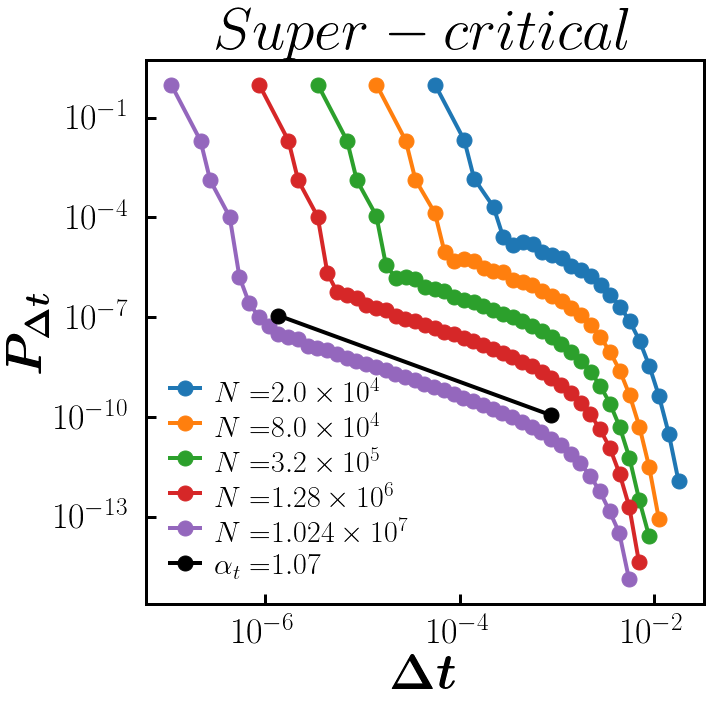

In [26]:
_, ax = plt.subplots(figsize=(10,10))

acceptanceThreshold = 0.5

# main plot
# for networkSize in networkSizeList[:]:
for networkSize in [20000, 80000, 320000, 1280000, 10240000]:
    current = networkSize, acceptanceThreshold

    # iet, dist = interEventTimeDist_op[current, "before"]
    # iet = iet/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[11:-10], dist[11:-10], offset=0.5)

    # iet, dist = interEventTimeDist_op[current, "during"]
    # iet = iet/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[8:-4], dist[8:-4], offset=-0.5)

    # iet, dist = interEventTimeDist_op[current, "after"]
    # iet = iet/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[:], dist[:], offset=-0.5)


    # iet, dist = interEventTimeDist_time[current, "before"]
    # iet = iet/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[11:-10], dist[11:-10], offset=-0.5)
    # fitX2, fitY2, alpha2, residual = logFit(iet[:5], dist[:5], offset=-0.5)

    # iet, dist = interEventTimeDist_time[current, "during"]
    # iet = iet/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[6:-7], dist[6:-7], offset=-0.5)

    iet, dist = interEventTimeDist_time[current, "after"]
    iet = iet/networkSize
    fitX, fitY, alpha, residual = logFit(iet[8:-8], dist[8:-8], offset=-0.5)

    ax.plot(iet, dist, 'o-', label=latexString("N=") + latexSci(networkSize))

# log fit
ax.plot(fitX, fitY, 'ko-', label=latexString("\\alpha_t=") + latexFloat(-1*alpha, 2))
# ax.plot(fitX2, fitY2, 'ko-', label=latexString("\\alpha_t=") + latexFloat(-1*alpha2, 2))

# main setting
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\\Delta t")); ax.set_ylabel(latexBoldString("P_{\\Delta t}"))
ax.legend(loc='lower left', fontsize=30)
# plt.title(latexString("Sub-critical"))
# plt.title(latexString("critical"))
plt.title(latexString("Super-critical"))

# save and show
plt.savefig("../data/mBFW/fig/ietDist_superT(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()



# Delta Upper bound Dist

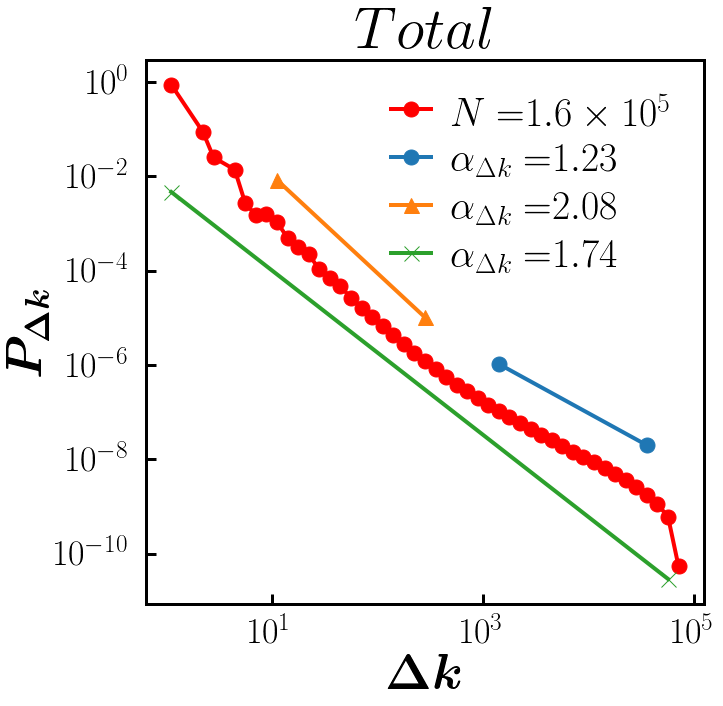

In [32]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 160000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

# dk, dist = deltaUpperBoundDist_op[current, "before"]
# dk, dist = deltaUpperBoundDist_op[current, "during"]
# dk, dist = deltaUpperBoundDist_op[current, "after"]
dk, dist = deltaUpperBoundDist_tot[current]


# dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk/networkSize
fitX, fitY, alpha, residual = logFit(dk[28:-3], dist[28:-3], offset = -1.0)
fitX2, fitY2, alpha2, residual2 = logFit(dk[7:22], dist[7:22], offset = -1.0)
fitX3, fitY3, alpha3, residual3 = logFit(dk[:-1], dist[:-1], offset = 1.0)

ax.plot(dk, dist, 'o-', color='r', label=latexString("N=") + latexSci(networkSize))
ax.plot(fitX, fitY, 'o-', label=latexString("\\alpha_{\\Delta k}=") + latexFloat(-1*alpha,2))
ax.plot(fitX2, fitY2, '^-', label=latexString("\\alpha_{\\Delta k}=") + latexFloat(-1*alpha2,2))
ax.plot(fitX3, fitY3, 'x-', label=latexString("\\alpha_{\\Delta k}=") + latexFloat(-1*alpha3,2))


ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\\Delta k")); ax.set_ylabel(latexBoldString("P_{\\Delta k}"))
ax.legend(loc='upper right')
# ax.set_xlim(right = 1)
# ax.set_ylim(top = 1)

# plt.title(latexString("Sub-critical"))
# plt.title(latexString("Critical"))
# plt.title(latexString("Super-critical"))
plt.title(latexString("Total"))

# plt.savefig("../data/mBFW/fig/deltaKDist_tot(N1.6e5,G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()

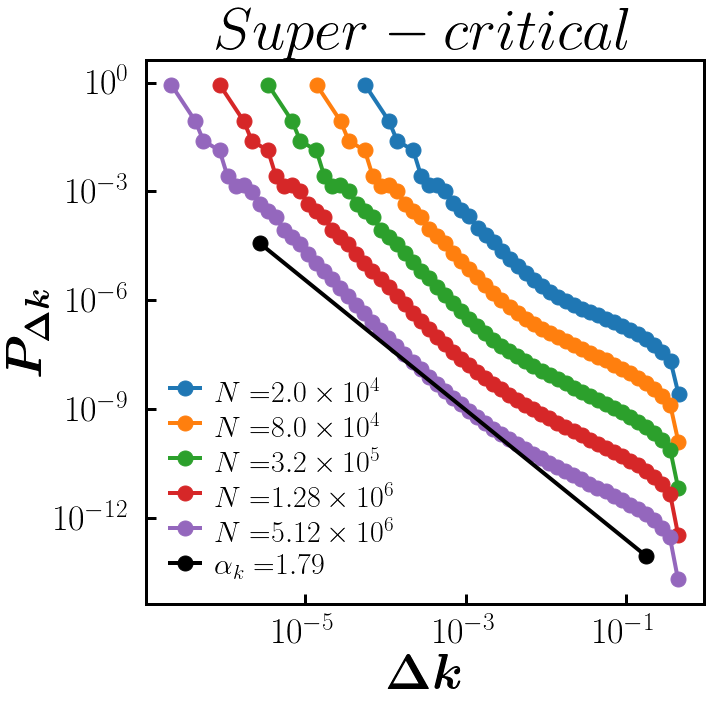

In [46]:
_, ax = plt.subplots(figsize=(10,10))

acceptanceThreshold = 0.5

# main plot
# for networkSize in networkSizeList[:]:
for networkSize in [20000, 80000, 320000, 1280000, 5120000]:
    current = networkSize, acceptanceThreshold

    # dk, dist = deltaUpperBoundDist_op[current, "before"]
    # dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    # fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)
    
    # dk, dist = deltaUpperBoundDist_op[current, "during"]
    # dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    # fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)
    
    # dk, dist = deltaUpperBoundDist_op[current, "after"]
    # dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    # fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)

    # dk, dist = deltaUpperBoundDist_time[current, "before"]
    # dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    # fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)

    # dk, dist = deltaUpperBoundDist_time[current, "during"]
    # dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    # fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)

    dk, dist = deltaUpperBoundDist_time[current, "after"]
    dk = dk[dist!=0]; dist = dist[dist!=0]; dk = dk / networkSize
    fitX, fitY, alpha, residual = logFit(dk[8:-4], dist[8:-4], offset=0.5)
    
    ax.plot(dk, dist, 'o-', label=latexString("N=") + latexSci(networkSize))

# log fit
ax.plot(fitX, fitY, 'ko-', label=latexString("\\alpha_k=") + latexFloat(-1*alpha, 2))
# ax.plot([1e3, 1e5], )

# main setting
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\\Delta k")); ax.set_ylabel(latexBoldString("P_{\\Delta k}"))
ax.legend(loc='lower left', fontsize=30)
# plt.title(latexString("Sub-critical"))
# plt.title(latexString("critical"))
plt.title(latexString("Super-critical"))

# save and show
# plt.savefig("../data/mBFW/fig/deltaKDist_superT(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()



# iet vs delta K 

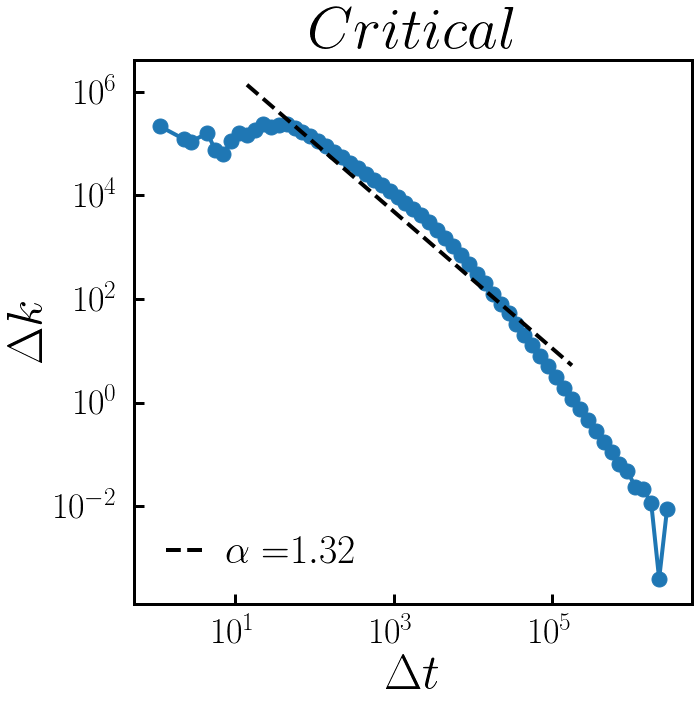

In [8]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10240000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

# iet ,dk = readCSV("/pds/pds172/hoyun1009/data/mBFW/interEventTime_deltaUpperBound/during/N1.3e+06,G0.5,E200000-0.txt")


iet, dk = interEventTime_deltaUpperBound[current, "before"]
# fitX, fitY, alpha, residual = logFit(iet[14:-6], dk[14:-6], offset=0.5)
# iet, dk = interEventTime_deltaUpperBound[current, "during"]
fitX, fitY, alpha, residual = logFit(iet[8:50], dk[8:50], offset=0)
# iet, dk = interEventTime_deltaUpperBound[current, "after"]
# fitX, fitY, alpha, residual = logFit(iet[:], dk[:], offset=0.5)

ax.plot(iet, dk, 'o-')
ax.plot(fitX, fitY, 'k--', label=latexString("\\alpha=") + latexFloat(-1*alpha,2))

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexString("\\Delta t")); ax.set_ylabel(latexString("\\Delta k"))
ax.legend(loc='lower left')
# plt.title(latexString("Sub-critical"))
plt.title(latexString("Critical"))

plt.show()

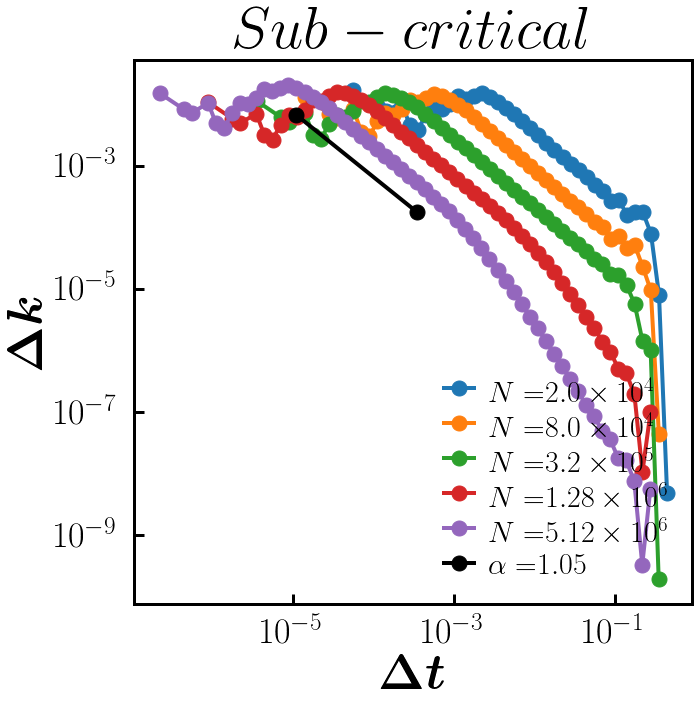

In [13]:
_, ax = plt.subplots(figsize=(10,10))

acceptanceThreshold = 0.5

# for networkSize in networkSizeList[:-3]:
for networkSize in [20000, 80000, 320000, 1280000, 5120000]:
    current = networkSize, acceptanceThreshold
    iet, dk = interEventTime_deltaUpperBound[current, "before"]
    iet = iet/networkSize; dk=dk/networkSize
    fitX, fitY, alpha, residual = logFit(iet[14:30], dk[14:30], offset= 0.5)

    # iet, dk = interEventTime_deltaUpperBound[current, "during"]
    # iet = iet/networkSize; dk=dk/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[6:-4], dk[6:-4], offset=0)

    # iet, dk = interEventTime_deltaUpperBound[current, "after"]
    # iet = iet/networkSize; dk=dk/networkSize
    # fitX, fitY, alpha, residual = logFit(iet[2:-3], dk[2:-3], offset=0.5)

    ax.plot(iet, dk, 'o-', label=latexString("N=") + latexSci(networkSize))

ax.plot(fitX, fitY, 'ko-', label=latexString("\\alpha=") + latexFloat(-1*alpha,2))
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\\Delta t")); ax.set_ylabel(latexBoldString("\\Delta k"))
ax.legend(loc='lower right', fontsize=30)
plt.title(latexString("Sub-critical"))
# plt.title(latexString("Critical"))
# plt.title(latexString("Super-critical"))

plt.savefig("../data/mBFW/fig/ietdK_sub(G0.5).pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()



# Order Parameter Dist

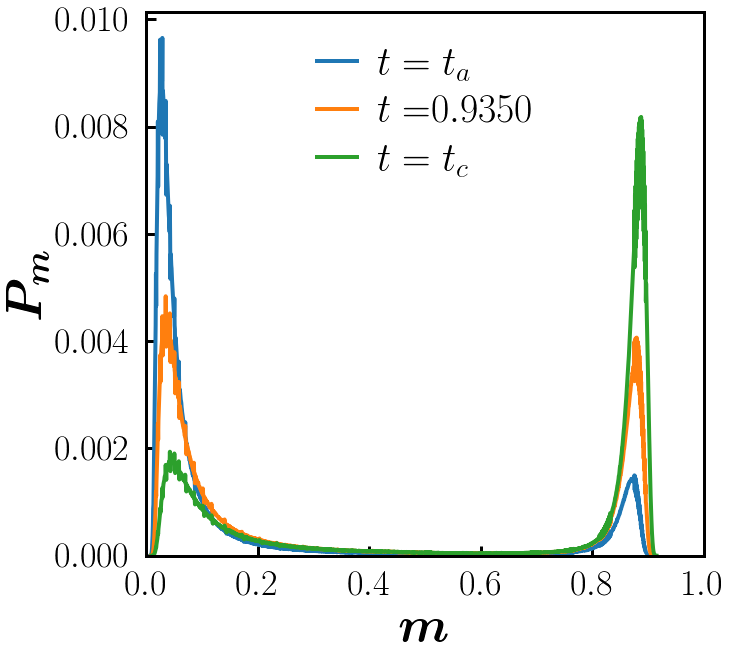

In [13]:
_, ax = plt.subplots()

networkSize = 20000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

def plotOPD(t):
    op, dist = orderParameterDist[current, t]
    ax.plot(op, dist, label=latexString("t=") + latexFloat(t,4))

t=0.933
op, dist = orderParameterDist[current, t]
ax.plot(op, dist, label=latexString("t=t_a"))


# t=0.933; plotOPD(t)
t=0.935; plotOPD(t)
# t=0.937; plotOPD(t)

t=0.937
op, dist = orderParameterDist[current, t]
ax.plot(op, dist, label=latexString("t=t_c"))


# default setting
ax.legend(loc="upper center")
ax.set_xlabel(latexBoldString("m")); ax.set_ylabel(latexBoldString("P_m"))
ax.set_xlim([0.0, 1.0]); ax.set_ylim(bottom=0)
xtick = np.linspace(0.0, 1.0, 6); ax.set_xticks(xtick); ax.set_xticklabels(list_latexFloat(xtick,1))

# save and show
# plt.savefig("./fig/orderParameterDist.png", bbox_inches = 'tight', pad_inches = 0.0, facecolor = 'w')
plt.show()

In [16]:
_, ax = plt.subplots()

inset_x = 0.3
inset_y = 0.5

# default plot
networkSize = 1280000; acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
L,t,m,k = dynamics[current]
t = t/networkSize; L = L/networkSize
A = t/L

ax.plot(t, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("L/u"))
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
xtick = np.linspace(0, 1, 6)
ytick = np.linspace(0.4, 1, 7)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 1))
ax.set_yticklabels(list_latexFloat(ytick, 1))

# zoom line
inset_x = 0.3
inset_y = 0.5
ax.plot([L[startIndex], inset_x], [0.5, (acceptanceThreshold+0.9)*inset_y], 'k:')
ax.plot([L[endIndex], inset_x+0.4], [0.5, (acceptanceThreshold+0.9)*inset_y+(1.1-acceptanceThreshold)*0.4], 'k:')

# # twin plot
ax1 = ax.twinx()
ax1.plot(t, k, color='red')

# twin setting
ax1.set_ylabel(latexString("k"))
ax1.set_ylim([0,40])
ytick = np.linspace(0,40,5)
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexFloat(ytick, 0))

# # inset plot
# ax2 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(inset_x, inset_y, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
# ax2.plot(l, a, color='blue')
# ax2.plot([l[0], l[-1]], [acceptanceThreshold, acceptanceThreshold])

# # inset settting
# ax2.set_xlim([l[0], l[-1]])
# ax2.set_ylim([acceptanceThreshold, acceptanceThreshold+0.02])
# xtick = [0.6,0.8]
# ytick = [0.5,0.51,0.52]
# ax2.set_xticks(xtick)
# ax2.set_yticks(ytick)
# ax2.set_xticklabels(list_latexFloat(xtick, 1))
# ax2.set_yticklabels(list_latexFloat(ytick, 2))

# # inset twin plot
# ax3 = ax2.twinx()
# ax3.plot(l, k, color='red')

# # inset twin setting
# ytick = [0,10,20]
# ax3.set_yticks(ytick)
# ax3.set_yticklabels(list_latexFloat(ytick, 0))

# save and show
plt.show()

NameError: name 'startIndex' is not defined

In [13]:
t

array([      1,       2,       3, ..., 1279998, 1279998, 1279999])

# -----------------------------------------------------------

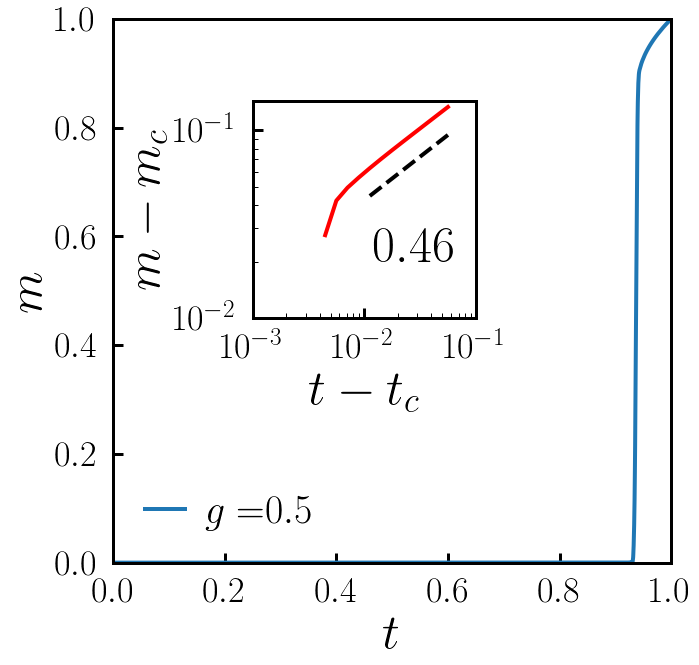

In [3]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# plot default
ax.plot(time, orderParameter[networkSize, acceptanceThreshold], label=latexString("g=")+latexFloat(0.5,1))

# default setting
xtick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ytick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexFloat(ytick,1))
ax.set_xlim(xtick[0], xtick[-1])
ax.set_ylim(ytick[0], ytick[-1])
ax.legend(loc='lower left')
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("m"))

# inset data
reducedT = logBinOrderParameter[networkSize, acceptanceThreshold][0]
op = logBinOrderParameter[networkSize, acceptanceThreshold][1]
mask = op>=0
reducedT = reducedT[mask]
op = op[mask]

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25,0.45,1,1), bbox_transform=ax.transAxes, loc='lower left', borderpad=0.0)
ax1.plot(reducedT, op, color='red')

# inset log fitting
fitX, fitY, beta, residual = logFit(reducedT[4:], op[4:], offset=0.15)
ax1.plot(fitX, fitY, 'k--')
ax1.text(1.2e-2,2e-2, latexFloat(beta,2))

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t-t_c"))
ax1.set_ylabel(latexString("m-m_c"))
xtick = [1e-3,1e-2,1e-1]
ytick = [1e-2,1e-1]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
ax1.set_xlim([1e-3,1e-1])
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1), np.arange(10,100,10)))
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("test")
# plt.savefig("test.png")
plt.show()


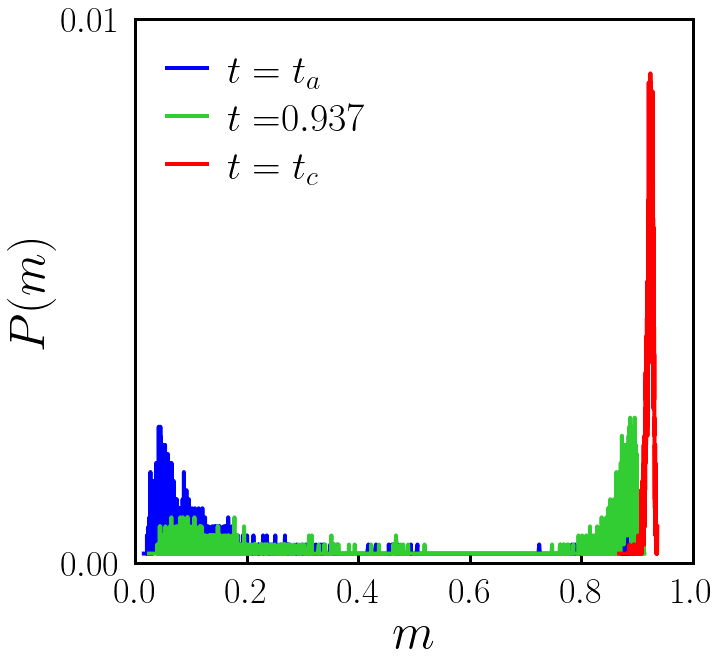

In [4]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
t = 0.932
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="blue", label=latexString("t=t_a"))

t = 0.937
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="limegreen", label=latexString("t=")+latexFloat(t))

t = 0.9482
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="red", label=latexString("t=t_c"))

# default setting
ax.legend(loc="upper left")
ax.set_xlabel(latexString("m"))
ax.set_ylabel(latexString("P(m)"))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 0.01])
xtick = np.linspace(0.0, 1.0, 6)
ytick = [0,0.01]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticklabels(list_latexFloat(ytick,2))

# save and show
plt.show()

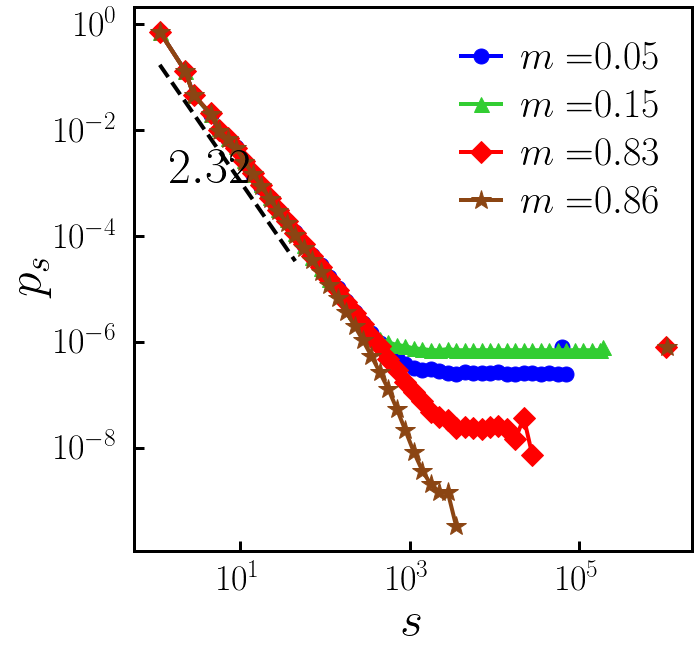

In [14]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# default plot
# op = 0.01
# clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
# ax.plot(clusterSize, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2))
# ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')

op = 0.05
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')

op = 0.15
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')

# op = 0.8
# clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
# ax.plot(clusterSize, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2))
# ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')

op = 0.8254
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')

# log fit
fitX, fitY, tau, residual = logFit(clusterSize[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

op = 0.86
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")
# ax.set_xlim([1,1e4])
# ax.set_ylim([1e-6,1])
# xtick = [1e0, 1e1, 1e2, 1e3, 1e4]
# ytick = [1e-6, 1e-4, 1e-2, 1]
# ax.set_xticks(xtick)
# ax.set_yticks(ytick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.yaxis.set_minor_locator(minortick_y)
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

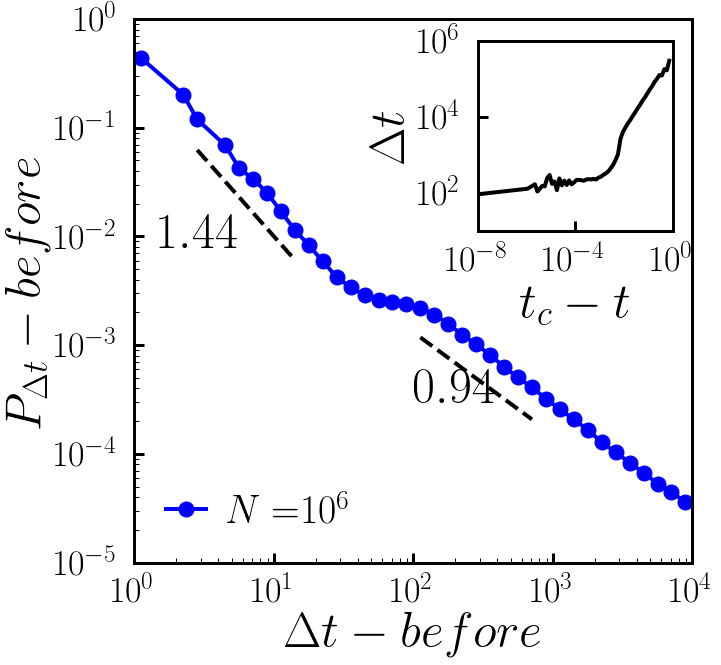

In [17]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_before[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_before[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[2:9], dist[2:9], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5, 8e-3, latexFloat(-1*alpha,2), fontsize=50)
fitX, fitY, alpha, residual = logFit(iet[17:26], dist[17:26], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 3e-4, latexFloat(-1*alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t-before"))
ax.set_ylabel(latexString("P_{\Delta t}-before"))
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-5,1e0])
xtick = np.power(10.0, np.linspace(0,4,5))
ytick = np.power(10.0, np.linspace(-5,0,6))
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="35%", height="35%", loc='lower left', bbox_to_anchor=(0.615, 0.61, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = interEventTime[networkSize, acceptanceThreshold][0]
iet = interEventTime[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, iet, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t_c-t"))
ax1.set_ylabel(latexString("\Delta t"))
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e1,1e6])
xtick = [1e-8,1e-4,1e0]
ytick = [1e2,1e4,1e6]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.yaxis.set_minor_locator(minortick_y)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()


In [27]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_during[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_during[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[5:15], dist[5:15], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(2e1, 1e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t-during"))
ax.set_ylabel(latexString("P_{\Delta t-during}"))
ax.set_xlim([1e0,1e3])
ax.set_ylim([1e-7,1e0])
xtick = [1e0,1e1,1e2,1e3]
ytick = [1e-7,1e-5,1e-3,1e-1]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))

# save and show
plt.show()

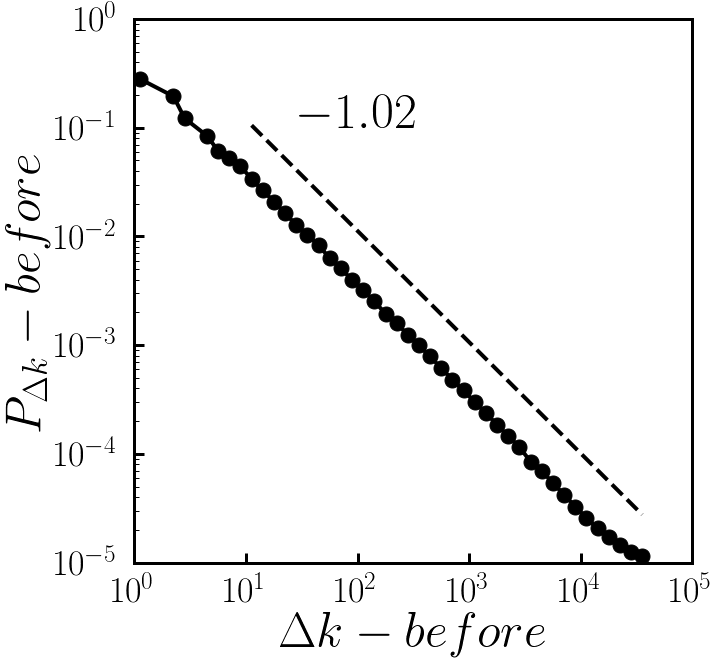

In [33]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, dist = deltaUpperBoundDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[7:], dist[7:], offset=-0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(3e1, 1e-1, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k-before"))
ax.set_ylabel(latexString("P_{\Delta k}-before"))
ax.set_xlim([1e0, 1e5])
ax.set_ylim([1e-5, 1e0])
xtick = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
ytick = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [43]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, dist = deltaUpperBoundDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[15:30], dist[15:30], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e2, 2e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k-during"))
ax.set_ylabel(latexString("P_{\Delta k}-during"))
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-7,1e0])
xtick = [1e0,1e2,1e4,1e6]
ytick = [1e-7,1e-5,1e-3,1e-1]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [51]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta a-before"))
ax.set_ylabel(latexString("P_{\Delta a}-before"))
ax.set_xlim([1e-7, 1e0])
ax.set_ylim([1e-3, 1e0])
xtick = [1e-7, 1e-5, 1e-3, 1e-1]
ytick = [1e-3, 1e-2, 1e-1, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.3, 0.55, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = deltaAcceptance[networkSize, acceptanceThreshold][0]
delA = deltaAcceptance[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, delA, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t-t_c"), labelpad=-10)
ax1.set_ylabel(latexString("\Delta a"), labelpad=0)
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e-6,1e0])
xtick = [1e-8,1e-4,1e0]
ytick = [1e-6,1e-3,1e0]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e3, subs=np.arange(100,1000,100))
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

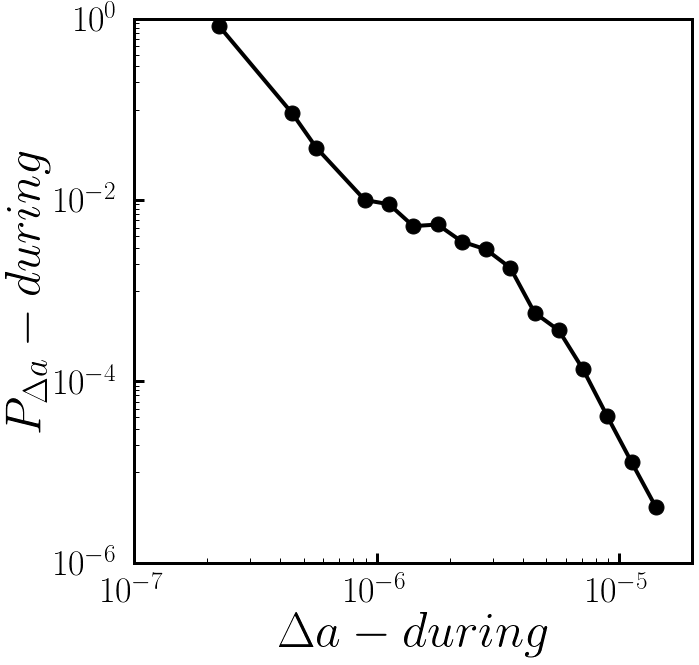

In [60]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta a-during"))
ax.set_ylabel(latexString("P_{\Delta a}-during"))
ax.set_xlim([1e-7, 2e-5])
ax.set_ylim([1e-6, 1e0])
xtick = [1e-7, 1e-6, 1e-5]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

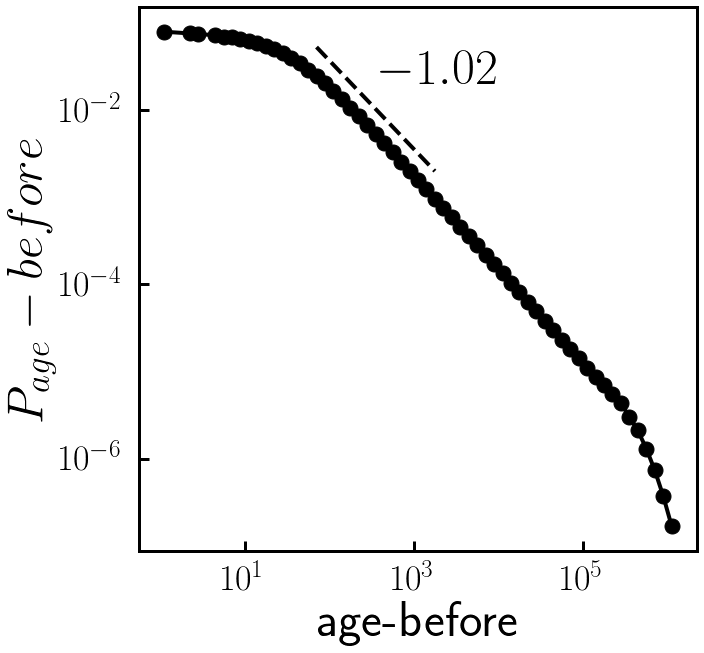

In [16]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
age, dist = ageDistribution_before[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[15:30], dist[15:30], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e2, 2e-2, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("age-before")
ax.set_ylabel(r"$P_{age}-before$")
# ax.set_xlim([1e0,1e4])
# ax.set_ylim([1e-5,1e-1])
# xtick = [1e0,1e2,1e4]
# ytick = [1e-5,1e-3,1e-1]
# ax.set_xticks(xtick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticks(ytick)
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(100,1000,100))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.yaxis.set_minor_locator(minortick_y)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



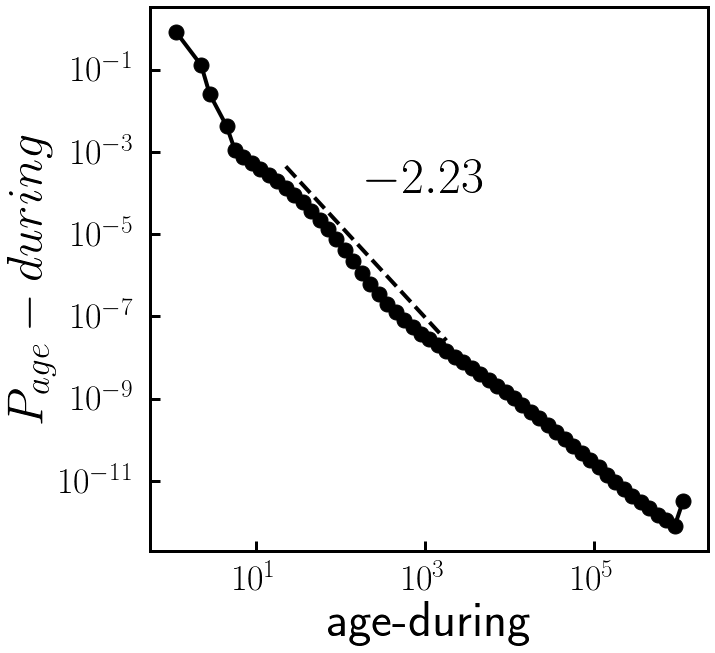

In [18]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
age, dist = ageDistribution_during[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[10:30], dist[10:30], offset=-0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(2e2, 1e-4, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("age-during")
ax.set_ylabel(r"$P_{age}-during$")
# ax.set_xlim([1e0,1e4])
# ax.set_ylim([1e-8,1e0])
# xtick = [1e0,1e2,1e4]
# ytick = [1e-8,1e-6,1e-4,1e-2,1e0]
# ax.set_xticks(xtick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticks(ytick)
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.yaxis.set_minor_locator(minortick_y)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



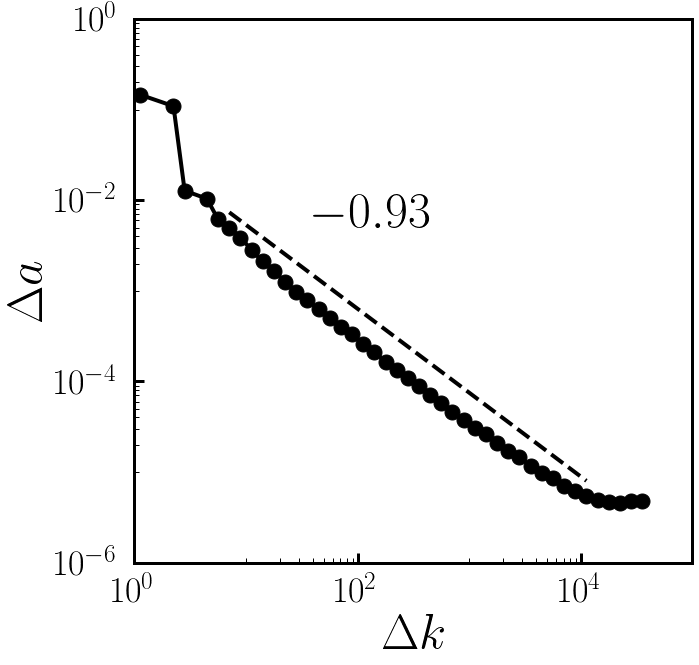

In [68]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, delA = deltaUpperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(delK, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(delK[5:-5], delA[5:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0,1e5])
ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

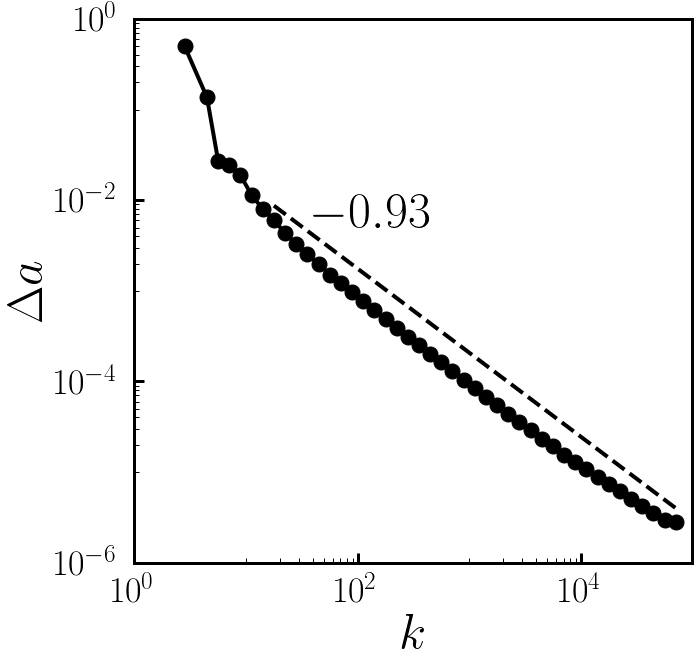

In [71]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
k, delA = upperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(k, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(k[7:], delA[7:], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("k"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0,1e5])
ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

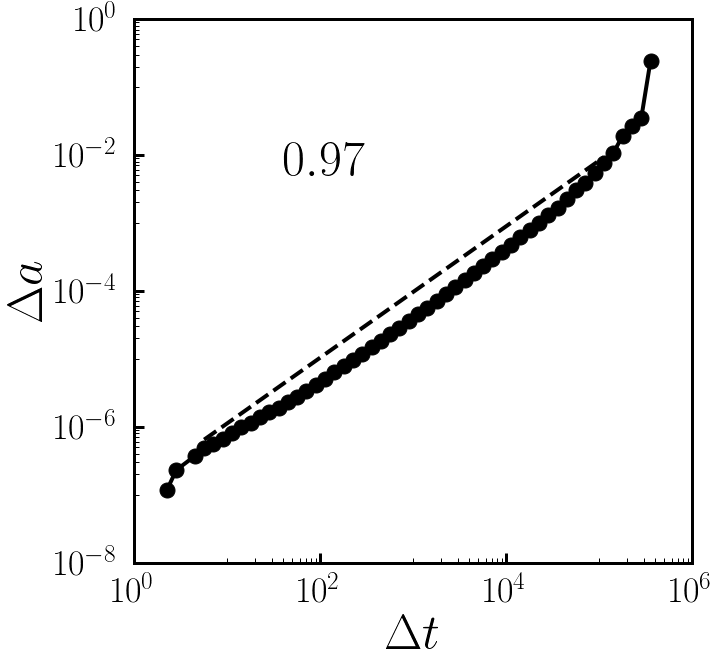

In [75]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet, delA = interEventTime_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(iet, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(iet[3:-5], delA[3:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0, 1e6])
ax.set_ylim([1e-8, 1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

# Dynamics

In [23]:
networkSize = 10000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_before[networkSize, acceptanceThreshold]

index = []
upperBound = []
i = 1
while len(index) < 7:
    if PL[i] == 1:
        index.append(i-1)
        upperBound.append(K[i-1])
    i += 1
# print(index)
# print(upperBound)

startIndex = index[2]-1
endIndex = index[-1]
A = t/U
PA = PL/PU
L = t/networkSize
l = L[startIndex:endIndex]
u = U[startIndex:endIndex]/networkSize
a = A[startIndex:endIndex]
k = K[startIndex:endIndex]



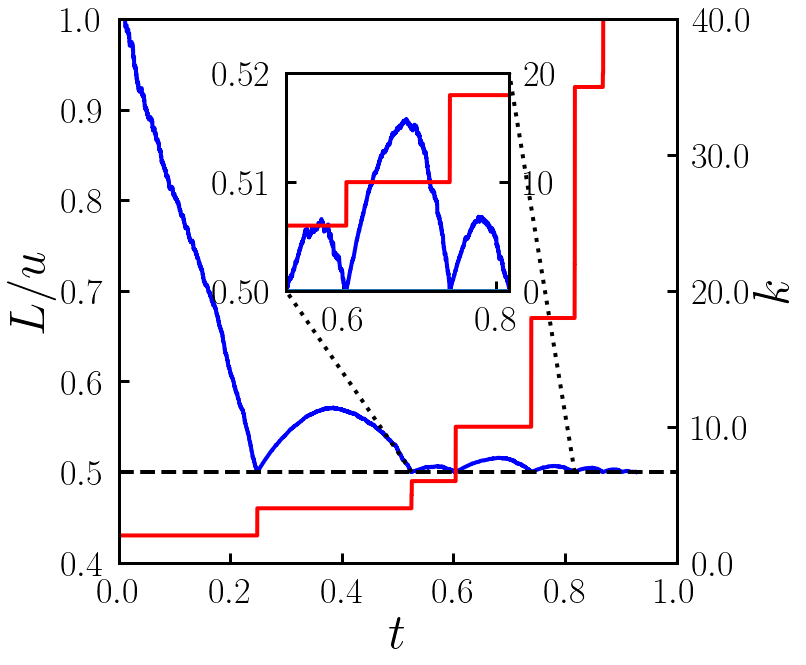

In [4]:
_, ax = plt.subplots()

inset_x = 0.3
inset_y = 0.5

# default plot
ax.plot(L, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L/u"))
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
xtick = np.linspace(0, 1, 6)
ytick = np.linspace(0.4, 1, 7)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 1))
ax.set_yticklabels(list_latexFloat(ytick, 1))

# zoom line
inset_x = 0.3
inset_y = 0.5
ax.plot([L[startIndex], inset_x], [0.5, (acceptanceThreshold+0.9)*inset_y], 'k:')
ax.plot([L[endIndex], inset_x+0.4], [0.5, (acceptanceThreshold+0.9)*inset_y+(1.1-acceptanceThreshold)*0.4], 'k:')

# twin plot
ax1 = ax.twinx()
ax1.plot(L, K, color='red')

# twin setting
ax1.set_ylabel(latexString("k"))
ax1.set_ylim([0,40])
ytick = np.linspace(0,40,5)
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexFloat(ytick, 0))

# inset plot
ax2 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(inset_x, inset_y, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
ax2.plot(l, a, color='blue')
ax2.plot([l[0], l[-1]], [acceptanceThreshold, acceptanceThreshold])

# inset settting
ax2.set_xlim([l[0], l[-1]])
ax2.set_ylim([acceptanceThreshold, acceptanceThreshold+0.02])
xtick = [0.6,0.8]
ytick = [0.5,0.51,0.52]
ax2.set_xticks(xtick)
ax2.set_yticks(ytick)
ax2.set_xticklabels(list_latexFloat(xtick, 1))
ax2.set_yticklabels(list_latexFloat(ytick, 2))

# inset twin plot
ax3 = ax2.twinx()
ax3.plot(l, k, color='red')

# inset twin setting
ytick = [0,10,20]
ax3.set_yticks(ytick)
ax3.set_yticklabels(list_latexFloat(ytick, 0))

# save and show
plt.show()

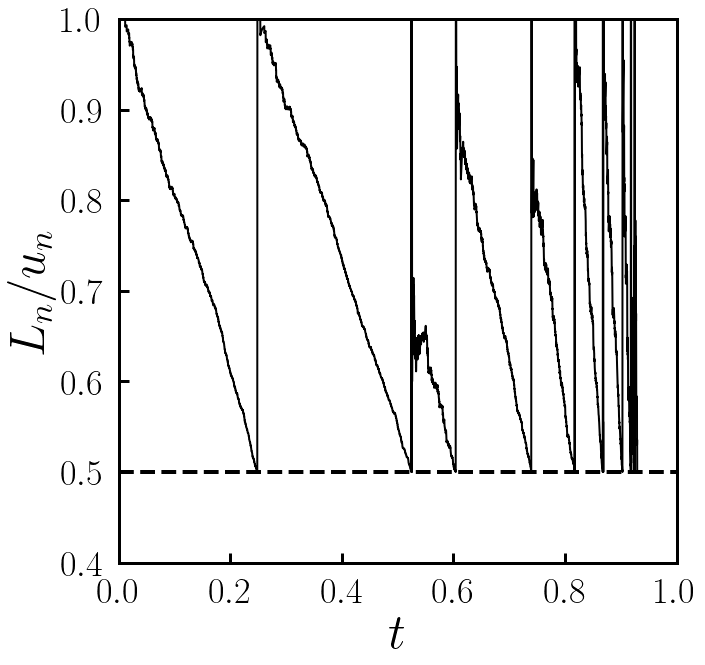

In [24]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L_n/u_n"))

# save and show
plt.show()

In [25]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

In [27]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[30:], power[30:], offset=-2)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 1e-4, latexFloat(alpha,2))

# main setting
ax.set_xlabel(latexString("f"))
ax.set_ylabel(latexString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-12,1e0])
xtick = [1e0,1e2,1e4]
ytick = [1e-12,1e-8,1e-4,1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticklabels(list_latexSci(ytick))

minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [8]:
networkSize = 10000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_during[networkSize, acceptanceThreshold]

A = t/U
PA = PL/PU
L = t/networkSize


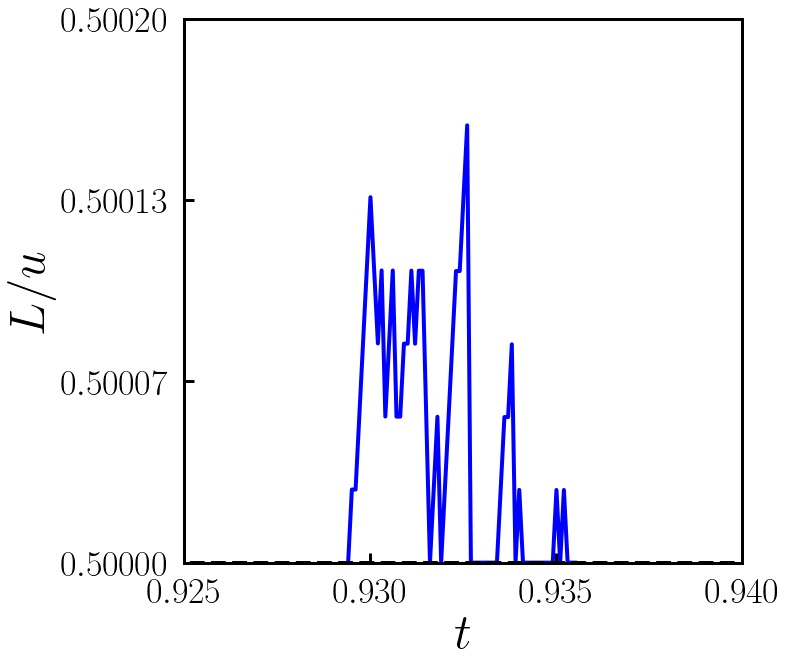

In [9]:
_, ax = plt.subplots()

# default plot
ax.plot(L, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L/u"))
ax.set_xlim([0.925,0.94])
ax.set_ylim([acceptanceThreshold, acceptanceThreshold+0.0002])
xtick = np.linspace(0.925, 0.940, 4)
ytick = np.linspace(acceptanceThreshold, acceptanceThreshold+0.0002, 4)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 3))
ax.set_yticklabels(list_latexFloat(ytick, 5))

# save and show
plt.show()

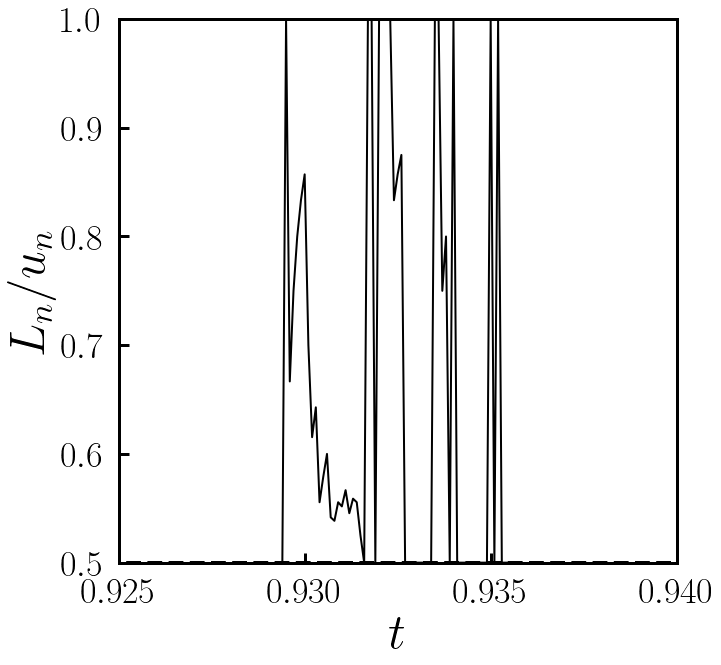

In [10]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim([0.925,0.94])
ax.set_ylim([acceptanceThreshold,1])
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L_n/u_n"))

# save and show
plt.show()

In [13]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

In [22]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[1:], power[1:], offset=-1)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 1e-4, latexFloat(alpha,2))

# main setting
ax.set_xlabel(latexString("f"))
ax.set_ylabel(latexString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-6,1e0])
xtick = [1e0,1e2,1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()